In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция
в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.


In [4]:
df = pd.read_csv('water.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


2. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

1. Построить точечный график
2. Рассчитать коэффициенты корреляции Пирсона и Спирмена
3. Построить модель линейной регрессии
4. Рассчитать коэффициент детерминации
5. Вывести график остатков

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

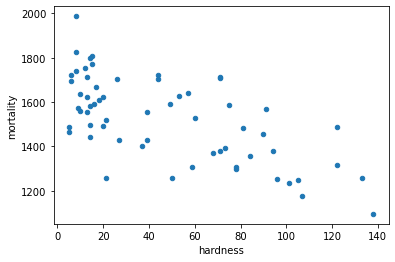

In [50]:
# Построить точечный график
df.plot(kind='scatter', x='hardness', y='mortality')

In [7]:
# Рассчитать коэффициенты корреляции Пирсона и Спирмена

df[['mortality', 'hardness']].corr(method='spearman') # наблюдается средняя отрицательная взаимосвязь. 
# Переменная сметности снижается в то время как жёсткость воды растёт  

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [8]:
df.corr() # КК Пирсона 

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [9]:
# Построить модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
X = df[['hardness']] # зависимая переменная/ые (факторы)
y = df['mortality'] # зависимая переменная (предстаказываем её значение)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5) # разделяем наши данные 

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)  # обучаем модель, подбирая оптимальные коэффициенты


LinearRegression()

In [13]:
model.coef_

array([-2.90641603])

In [14]:
model.intercept_

1657.027525742606

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1633.77619749, 1616.3377013 , 1255.94211335, 1514.61314018,
       1392.54366684, 1639.58902955, 1444.85915542, 1450.67198748,
       1543.6773005 , 1346.04101033, 1363.47950652, 1616.3377013 ,
       1529.14522034])

In [16]:
r2 = round(model.score(X_test, y_test),2) # нахождение коэффициента детерминации
print (r2)

0.48


Text(0.5, 0, 'water hardness')

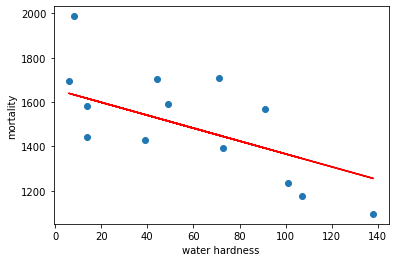

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='red')
plt.ylabel('mortality')
plt.xlabel('water hardness') # есть погрешность вокруг фактов - мы не идеально прогнозируем 

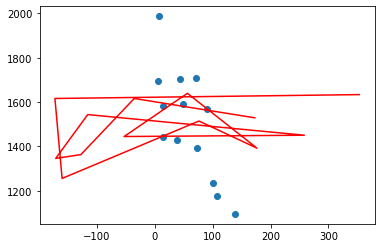

In [18]:
# построим графики остатков 
plt.scatter(X_test, y_test)
plt.plot(y_test-y_pred, y_pred, c='r' )

3. Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [19]:
# СТРОИМ ДЛЯ ЮЖНЫХ ГОРОДОВ 

df_south = df.loc[df['location'] == 'South'] 
df_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

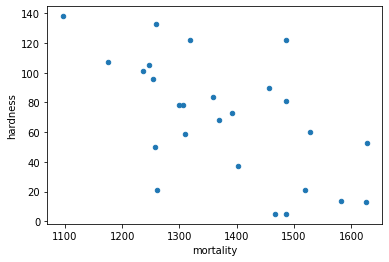

In [20]:
# Построить точечный график
df_south.plot(kind='scatter', x='mortality', y='hardness')

In [21]:
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [22]:
df_south.corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [30]:
# Строим модель линейной регрессии
X = df_south[['hardness']] # независимая переменная/ые (факторы)
Y = df_south['mortality'] # зависимая переменная (предсказываем её значение)

In [31]:
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=5) # разделяем наши данные 

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[-1.89721192]
1523.5422045247606


In [33]:
y_pred = model.predict(X_test)
y_pred

array([1409.7094891 , 1394.53179371, 1375.55967448, 1453.34536335,
       1428.68160834, 1261.72695905])

In [34]:
r2 = round(model.score(X_test, y_test),2) # нахождение коэффициента детерминации
print(r2)

0.25


Text(0.5, 0, 'water hardness')

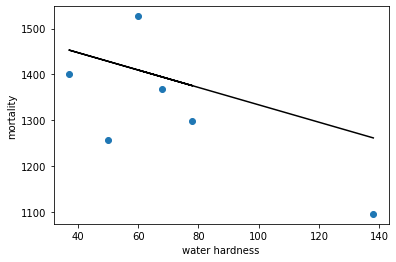

In [35]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='black')
plt.ylabel('mortality')
plt.xlabel('water hardness') # есть погрешность вокруг фактов - мы не идеально прогнозируем 

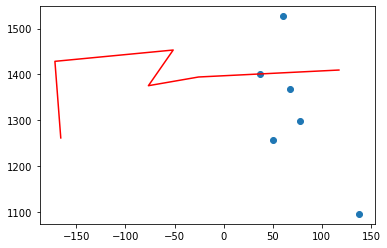

In [36]:
# построим графики остатков (ЮЖНЫЕ ГОРОДА)

plt.scatter(X_test, y_test)
plt.plot(y_test-y_pred, y_pred, c='r' )

In [38]:
# СТРОИМ ДЛЯ СЕВЕРНЫХ ГОРОДОВ 

df_north = df.loc[df['location'] == 'North'] 
df_north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

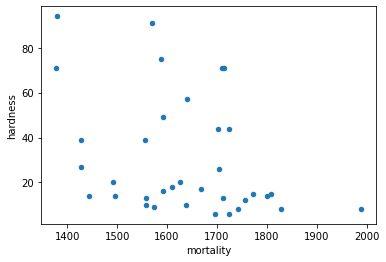

In [39]:
# Построить точечный график
df_north.plot(kind='scatter', x='mortality', y='hardness')

In [40]:
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [41]:
df_north.corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [42]:
# Строим модель линейной регрессии
X = df_north[['hardness']] # зависимая переменная/ые (факторы)
Y = df_north['mortality'] # зависимая переменная (предстаказываем её значение)

In [44]:
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=5) # разделяем наши данные 

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[-2.17492095]
1708.1197495227818


In [46]:
y_pred = model.predict(X_test)
y_pred

array([1584.1492553 , 1695.07022381, 1686.37054001, 1651.57180479,
       1649.39688384, 1686.37054001, 1671.14609335])

In [47]:
r2 = round(model.score(X_test, y_test),2) # нахождение коэффициента детерминации
print(r2)

-0.3


Text(0.5, 0, 'water hardness')

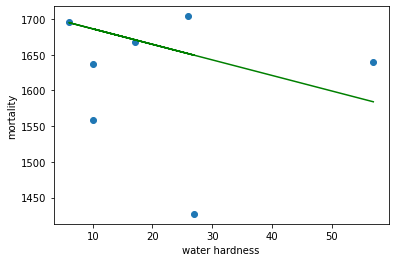

In [48]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='green')
plt.ylabel('mortality')
plt.xlabel('water hardness') # есть погрешность вокруг фактов - мы не идеально прогнозируем 

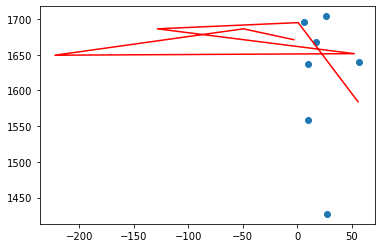

In [49]:
# построим графики остатков (СЕВЕРНЫЕ ГОРОДА)

plt.scatter(X_test, y_test)
plt.plot(y_test-y_pred, y_pred, c='r' )

# Интерпретация результатов 

Коэффициент детерминации для модели с константой принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость. 
Коэффициент детерминации для всего фрейма данных получился равным 0,48 (это почти 50%)
Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50% (в этом случае коэффициент множественной корреляции превышает по модулю 70%).
То есть мы можем сказать, что данная модель приемлема. 
А вот что касается нахождения коэффициента для Южной и Северной групп по отдельности, то здесь мы получаем -0,31 и 0,30, а это 
значит, что разработанная модель даёт прогноз хуже, чем простое усреднение 